In [11]:
# Word2Vec and GloVe are the two popular models to create word
# embidding of a text. These models take text as input and produce
# vectors as output.

# Using gensim for Word2Vec.

from gensim.models import Word2Vec

sentences = [['data', 'science'],
             ['vidhya', 'science', 'data', 'analytics'],
             ['machine', 'learning'], ['deep', 'learning']]

model = Word2Vec(sentences, min_count=1)
print (model.wv.similarity('data', 'science'))
# print (model['learning'])
model.wv.similar_by_word('data')

-0.09535207111804583


[('deep', 0.149797722697258),
 ('vidhya', 0.0822608470916748),
 ('analytics', 0.002298962324857712),
 ('machine', -0.022537071257829666),
 ('learning', -0.041219718754291534),
 ('science', -0.09535208344459534)]

/home/abhinav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


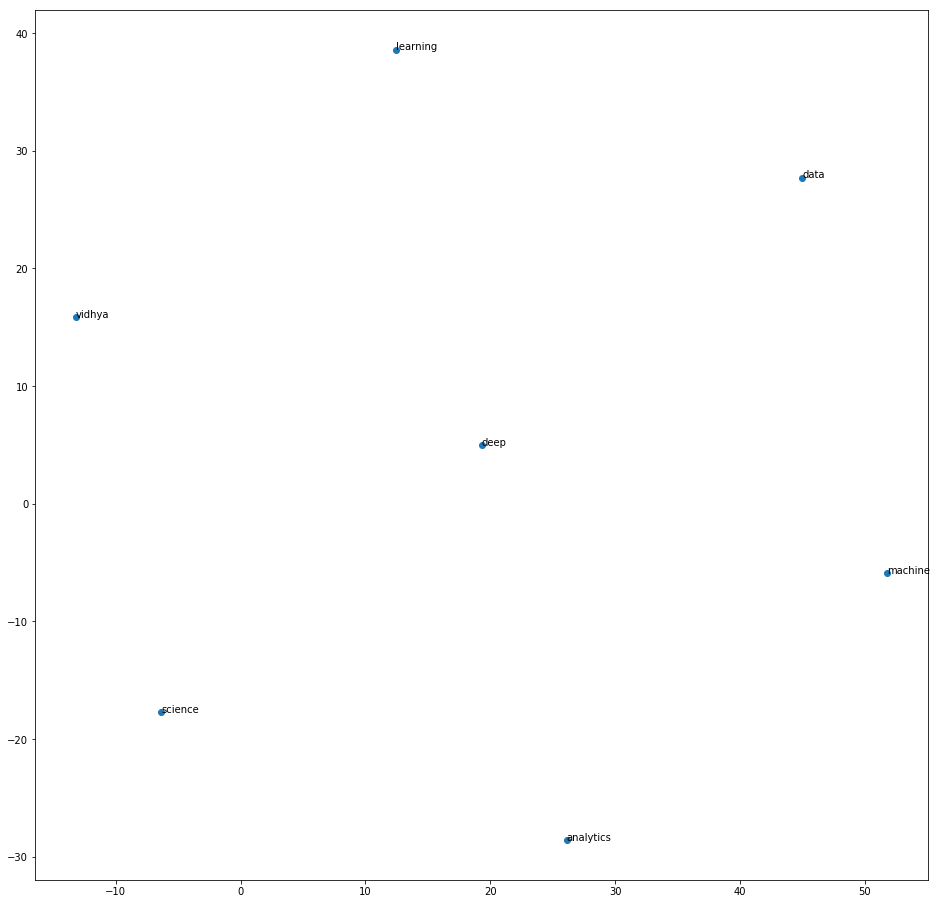

In [40]:
# Visualizing Word2Vec using t-sne from sklearn and t-sne vizualization

from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

"Creates TSNE model and plots it"

labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

# print("labels",labels)
# print("tokens",tokens)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca',
                  n_iter=2500, random_state=23)

xy = tsne_model.fit_transform(tokens)

x = xy[:,0]
y = xy[:,1]

# plot the figure

plt.figure(figsize=(16,16))

plt.scatter(x, y)

for label, x, y in zip(labels, x, y):

    plt.annotate(    label,
                     xy=(x,y),
                     xytext=(0, 0),
                     textcoords='offset points')
    